In [11]:
#%matplotlib widget

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
from ipywidgets import interact

In [2]:
class Edge(object):
    def __init__(self, u, v, w):
        self.source = u
        self.sink = v  
        self.capacity = w
    def __repr__(self):
        return "%s->%s:%s" % (self.source, self.sink, self.capacity)

class FlowNetwork(object):
    def __init__(self):
        self.adj = {}
        self.flow = {}
 
    def add_vertex(self, vertex):
        self.adj[vertex] = []
 
    def get_edges(self, v):
        return self.adj[v]
 
    def add_edge(self, u, v, w=0):
        if u == v:
            raise ValueError("u == v")
        edge = Edge(u,v,w)
        redge = Edge(v,u,0)
        edge.redge = redge
        redge.redge = edge
        self.adj[u].append(edge)
        self.adj[v].append(redge)
        self.flow[edge] = 0
        self.flow[redge] = 0
 
    def find_path(self, source, sink, path):
        if source == sink:
            return path
        for edge in self.get_edges(source):
            residual = edge.capacity - self.flow[edge]
            if residual > 0 and edge not in path:
                result = self.find_path( edge.sink, sink, path + [edge]) 
                if result != None:
                    return result
 
    def max_flow(self,G,npos, source, sink): 
        id = 1 
        
        path = self.find_path(source, sink, [])
        #coordinates=[[1,1],[2,1],[2,2],[3,1],[3,3],[4,2]]
        #vnode=np.array(coordinates)
        nodes=['s','o','p','q','r','t']
        #npos = nx.spring_layout(G)
        
        while path != None:
            #print(path)
            residuals = [edge.capacity - self.flow[edge] for edge in path]
            flow = min(residuals)
            edge_liste_path = []
            edge_path=(0,0)
            for edge in path:
                color_path = []
                self.flow[edge] += flow
                self.flow[edge.redge] -= flow
                try:
                    G[edge.source][edge.sink]['flow']
                except KeyError:
                    dict_exists = False
                else:
                    dict_exists = True
                if(dict_exists):
                    G[edge.source][edge.sink]['flow']+=flow
                    edge_path = (edge.source,edge.sink)
                else:
                    G[edge.sink][edge.source]['flow']-=flow
                    edge_path = (edge.sink,edge.source)
                if(edge_path in edge_liste_path):
                    edge_liste_path.remove(edge_path)
                else : 
                    edge_liste_path.append(edge_path)

            path = self.find_path(source, sink, [])
            #npos=dict(zip(nodes,vnode))
            
            node_labels = {}
            for node in G.nodes:
                node_labels[node] = str(node)
            nx.draw_networkx_labels(G, npos, labels=node_labels)
            edge_labels={}
            for edge in G.edges :
                edge_labels[edge]=str(G.edges[edge]['flow']) + ' / ' + str(G.edges[edge]['weight'])
              #edge_labels[edge]=str(edge)
            nx.draw_networkx_edge_labels(G,npos,edge_labels=edge_labels)
            #print(edge_liste_path)
            nx.draw_networkx_edges(G,npos,edgelist=edge_liste_path,edge_color='r',width = 8)
            nx.draw(G,npos)
            
            nx.draw_networkx_edges(G,npos,edgelist=edge_liste_path,edge_color='b')
            root = "./temp"+str(id)+".jpg"
            plt.savefig(root)
            plt.show()
            id=id+1
        return sum(self.flow[edge] for edge in self.get_edges(source))


In [3]:
g=FlowNetwork()

In [4]:
[g.add_vertex(v) for v in "sopqrt"]

[None, None, None, None, None, None]

In [5]:
def view_image(i=0):
    plt.figure(figsize=(7.5, 7.5))
    plt.imshow(imgs[i])
    plt.axis('off')
    plt.show()

['s', 'o', 'p', 'q', 'r', 't']


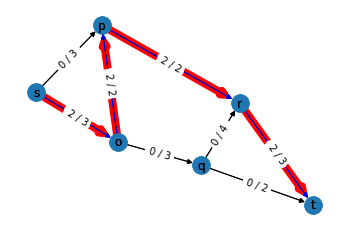

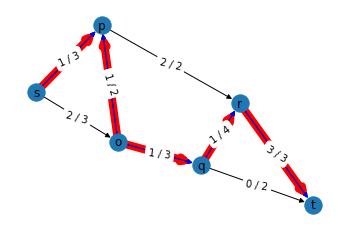

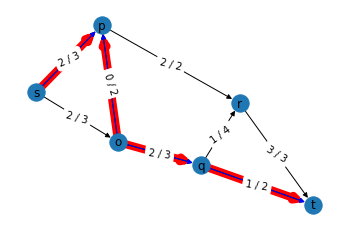

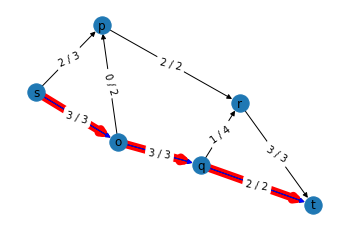

In [6]:
file = open('dataFlot1.txt')
line = file.readline()
line = line.strip().split(' ')
print(line)
G = nx.DiGraph()
[G.add_node(v) for v in line]
line = file.readline()
while line:
    line = line.strip().split(' ')
    G.add_edge(line[0],line[1],weight=int(line[2]),flow=0)
    g.add_edge(line[0],line[1],int(line[2]))
    line = file.readline()
file.close()

npos = nx.spring_layout(G)

node_labels = {}
for node in G.nodes:
     node_labels[node] = str(node)
nx.draw_networkx_labels(G, npos, labels=node_labels)
edge_labels={}
for edge in G.edges :
     edge_labels[edge]=str(G.edges[edge]['flow']) + ' / ' + str(G.edges[edge]['weight'])
     #edge_labels[edge]=str(edge)
nx.draw_networkx_edge_labels(G,npos,edge_labels=edge_labels)
nx.draw(G,npos)
root = "./temp0.jpg"
plt.savefig(root)


n=g.max_flow(G, npos, 's','t')

 


In [7]:
Datapath = "./*.jpg"
imgs = np.empty((n,288,432,3))
i = 0
for i in range(0,n):
    imageFile = './temp'+str(i)+'.jpg'
    #print(imageFile)
    img = np.array(Image.open(imageFile))/255.
    imgs[i] = img
    i += 1
interact(view_image, i=(0,n-1))


interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.view_image>